In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

,age,salary,buy
0,22,32000,0
1,24,36000,0
2,23,50000,0


<AxesSubplot:xlabel='age', ylabel='salary'>

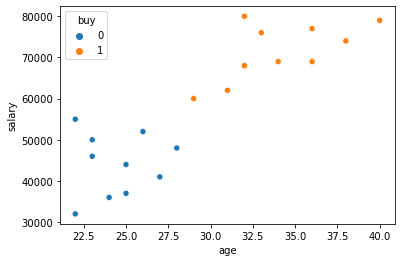

In [2]:
df=pd.DataFrame({"age":[22,24,23,28,25,22,26,23,25,27,29,31,32,33,32,36,40,38,36,34],
                "salary":[32000,36000,50000,48000,37000,55000,52000,46000,44000,41000,60000,62000,80000,76000,68000,69000,79000,74000,77000,69000],
                "buy":[0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]})
display(df.iloc[:3,:])
sn.scatterplot(df["age"],df["salary"],hue=df["buy"])

In [10]:
x=df[["age","salary"]]
y=df["buy"]
knc=KNeighborsClassifier(n_neighbors=3,p=1)
knc.fit(x,y)
pred=knc.predict([[22,50000]])
pred

array([0], dtype=int64)

# KNN-Classification

In [42]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv('diabetes.csv')
display(df.iloc[:2,:])
x = df.drop('Outcome',axis=1)
y = df['Outcome']
display(x.shape)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0


(768, 7)

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3 , random_state=34, stratify=y)

In [56]:
knn_model = KNeighborsClassifier()

hyp = {'p' :[1,2],
      'n_neighbors' : np.arange(25,30)}

gscv_knn_model = GridSearchCV(knn_model, hyp, cv = 7)
gscv_knn_model.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [57]:
print(gscv_knn_model.best_estimator_)
print(gscv_knn_model.best_params_)

KNeighborsClassifier(n_neighbors=28)
{'n_neighbors': 28, 'p': 2}


In [58]:
knn_model = gscv_knn_model.best_estimator_ # ED
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=28)

In [59]:
## Training Data Evaluation
y_pred_train = knn_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n", cnf_matrix)

acc_score = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",acc_score)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[321  29]
 [102  85]]
Accuracy is : 0.7560521415270018
Classification Report :
               precision    recall  f1-score   support

           0       0.76      0.92      0.83       350
           1       0.75      0.45      0.56       187

    accuracy                           0.76       537
   macro avg       0.75      0.69      0.70       537
weighted avg       0.75      0.76      0.74       537



In [60]:
## Testing Data Evaluation
y_pred = knn_model.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n", cnf_matrix)

acc_score = accuracy_score(y_test, y_pred)
print("Accuracy is :",acc_score)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[136  14]
 [ 47  34]]
Accuracy is : 0.7359307359307359
Classification Report :
               precision    recall  f1-score   support

           0       0.74      0.91      0.82       150
           1       0.71      0.42      0.53        81

    accuracy                           0.74       231
   macro avg       0.73      0.66      0.67       231
weighted avg       0.73      0.74      0.72       231



# KNN-Regression

In [66]:
df = pd.read_csv('Sales_data.csv')
display(df.iloc[:2,:])
display(df.shape)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


(8523, 12)